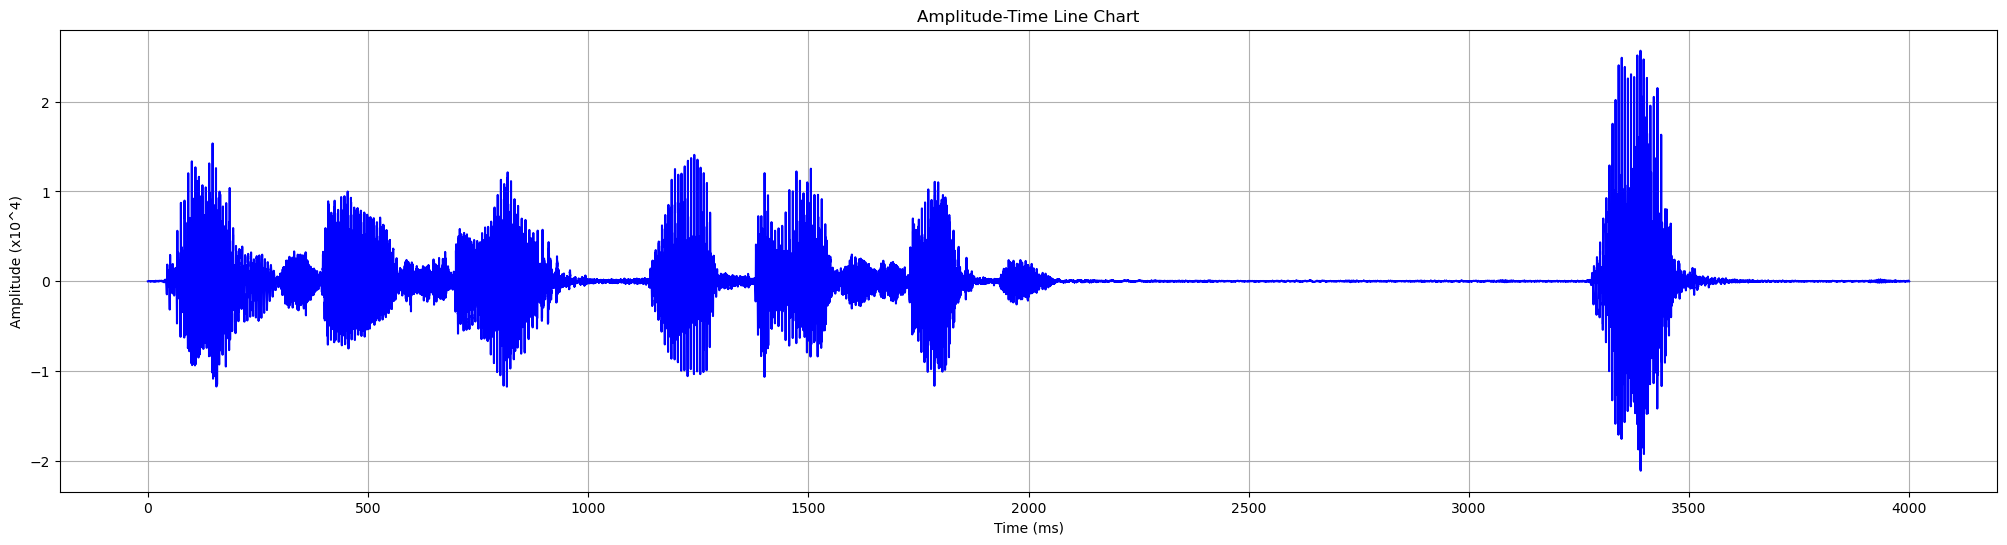

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave

# Load the WAV file
file_path = '1.wav'
wav_file = wave.open(file_path, 'r')

# Get the audio data
frames = wav_file.readframes(-1)
signal = np.frombuffer(frames, dtype=np.int16)

# Get the sample rate and time axis
sample_rate = wav_file.getframerate()
duration = len(signal) / sample_rate
time = np.linspace(0., duration, len(signal))

# Plot the amplitude-time line chart
plt.figure(figsize=(25, 6))
plt.plot(time*1000, signal/10000, color='blue')
plt.title('Amplitude-Time Line Chart')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (x10^4)')
plt.grid(True)
plt.show()

# Close the WAV file
wav_file.close()


In [70]:
def create_segements(signal,width,sample_rate):
    num=int(width*sample_rate/1000)
    ten_ms_segements = [signal[i:i+num] for i in range(0, len(signal), num)]
    twenty_ms_segements =[]
    for j in range(len(ten_ms_segements)):
        if j!=0:
            l1=ten_ms_segements[j-1]
            l2=ten_ms_segements[j]
            l=[0 for i in range(num*2)]
            for k in range(len(l1)):
                l[k]=l1[k]
                l[k+len(l1)]=l2[k]
            twenty_ms_segements.append(l)
    return twenty_ms_segements

def Hamming_window(segements):
    window=[0 for j in range(len(segements))]
    for i in range(len(segements)):
        window[i]=0.54-np.cos(np.array(segements[i])/320*2*np.pi)*0.46
    return window

def zero_Padding(window):
    zero_padding=[[0 for i in range(512)] for j in range(len(window))]
    for i in range(len(window)):
        for j in range(len(window[0])):
            zero_padding[i][j]=window[i][j]
    return zero_padding
    
def FFT(zero_padding):
    fft=[0 for i in range(len(zero_padding))]
    for j in range(len(zero_padding)):
        fft[j]=np.fft.fft(zero_padding[j]) 
    return fft

In [80]:
width=10
segements=create_segements(signal,width,sample_rate)
window=Hamming_window(segements)
zero_padding=zero_Padding(window)
fft=FFT(zero_padding)

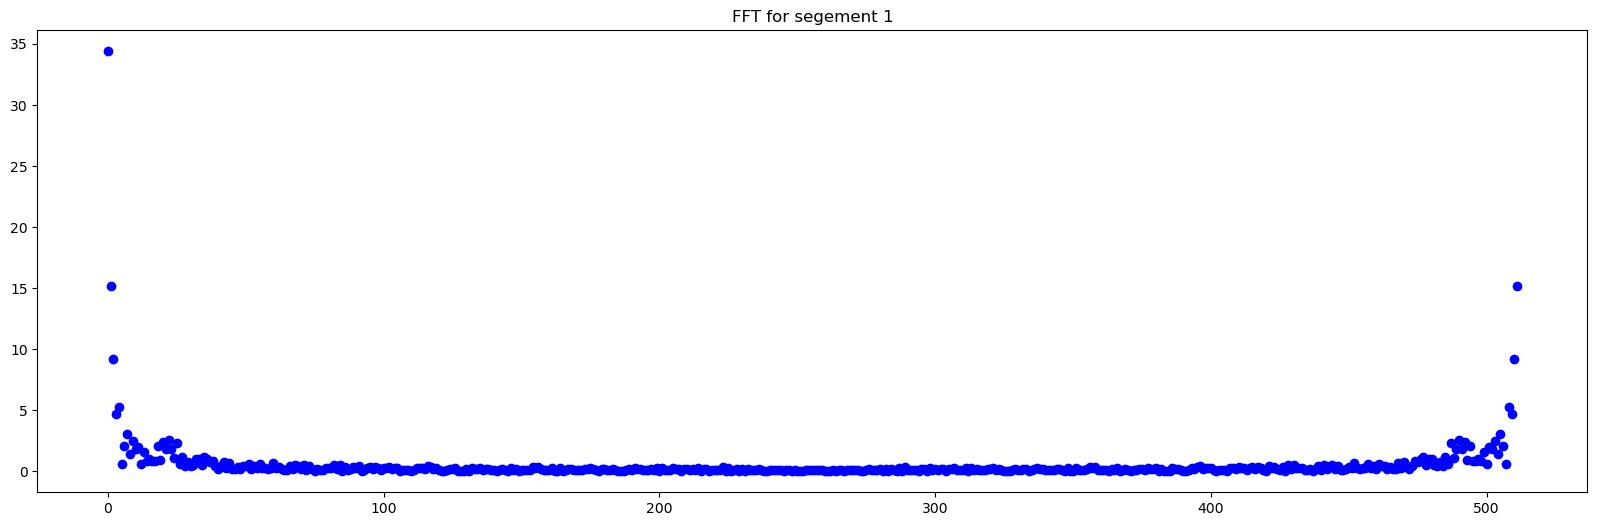

In [79]:
plt.figure(figsize=(20, 6))
plt.scatter([i for i in range(0,512)], np.abs(fft[0]), color='blue')
plt.title('FFT for segement 1')
plt.show()